Real-time plotting stopped.


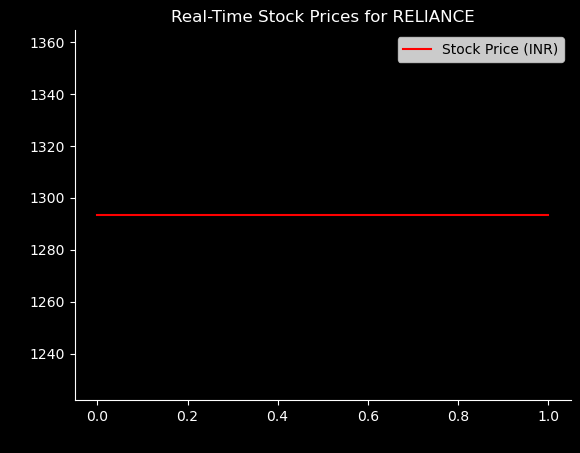

In [15]:
import requests
from bs4 import BeautifulSoup
import time
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline

# Initialize stock data and time
stock_ip = []
times = []
timeval = 0

# Set up the plot
plt.ion()  # Turn on interactive mode
fig, ax = plt.subplots()

# Ticker and URL for scraping
ticker = 'RELIANCE'
url = f'https://www.google.com/finance/quote/{ticker}:NSE'

# Plot initialization
line, = ax.plot([], [], label="Stock Price (INR)", color = 'red')
ax.set_facecolor('black')
fig.patch.set_facecolor('black')
# Change the color of the x-axis and y-axis lines
ax.spines['bottom'].set_color('white')  # X-axis
ax.spines['left'].set_color('white')   # Y-axis

# Optionally, hide the top and right spines if you don't need them
ax.spines['top'].set_color('none')     # Hide the top spine
ax.spines['right'].set_color('none')   # Hide the right spine


ax.set_title(f"Real-Time Stock Prices for {ticker}", color = 'white')
ax.set_xlabel("Time Intervals")
ax.set_ylabel("Price in INR")
ax.legend()

ax.tick_params(axis='x', colors='white')  # X-axis tick values color
ax.tick_params(axis='y', colors='white')   # Y-axis tick values color

try:
    while True:
        # Fetch stock data
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        class1 = "YMlKec fxKbKc"
        price = float(soup.find(class_=class1).text.strip()[1:].replace(",", ""))
        stock_ip.append(price)
        times.append(timeval)
        timeval += 1

        # Remove duplicates and average corresponding y values
        unique_x, indices = np.unique(times, return_inverse=True)
        y_aggregated = np.array([np.mean([stock_ip[i] for i in range(len(stock_ip)) if indices[i] == j]) for j in range(len(unique_x))])

        # Define x and y axes
        y_axis = np.array(unique_x)
        x_axis = np.array(y_aggregated)

        # Smooth curve interpolation
        if len(y_axis) > 3:  # Require at least 4 points for cubic spline
            k = min(3, len(x_axis) - 1)
            y_smooth = np.linspace(y_axis.min(), y_axis.max(), 300)
            spl = make_interp_spline(y_axis, x_axis, k=k)
            x_smooth = spl(y_smooth)
        else:
            y_smooth = y_axis
            x_smooth = x_axis

        # Update plot
        line.set_xdata(y_smooth)
        line.set_ydata(x_smooth)
        ax.relim()  # Recompute limits
        ax.autoscale_view()  # Rescale view
        fig.canvas.draw()
        fig.canvas.flush_events()

        # Wait before next update
        time.sleep(1)

except KeyboardInterrupt:
    print("Real-time plotting stopped.")
    plt.ioff()  # Turn off interactive mode
    plt.show()
